## Prerequisites

In [17]:
!pip install keras

In [2]:
import keras
import numpy as np
import pandas as pd

Using TensorFlow backend.
/Users/shaynekang/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


## Load Dataset

In [3]:
from keras.datasets import mnist

((X_train, y_train), (X_test, y_test)) = mnist.load_data()
 
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


### Visualize

[5 0 4 1 9 2 1 3 1 4]


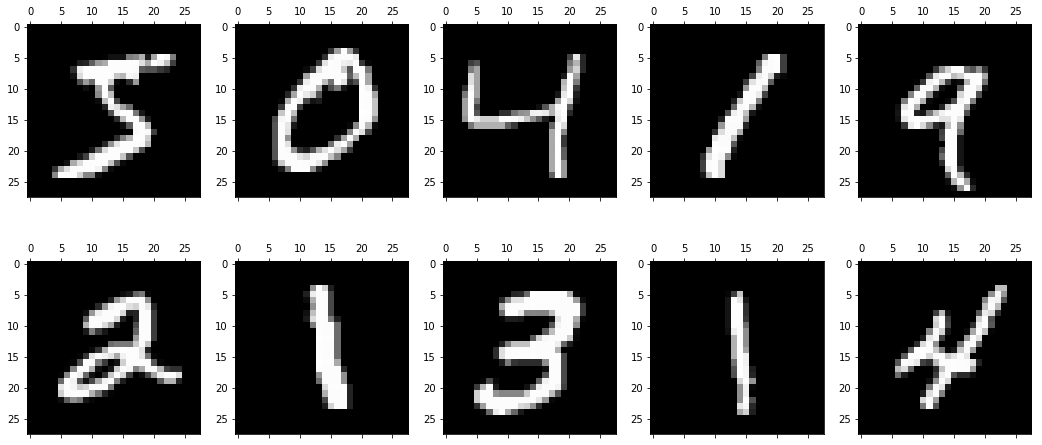

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.gray()

print(y_train[0:10])

figures, axes = plt.subplots(nrows=2, ncols=5)
figures.set_size_inches(18, 8)

axes[0][0].matshow(X_train[0])
axes[0][1].matshow(X_train[1])
axes[0][2].matshow(X_train[2])
axes[0][3].matshow(X_train[3])
axes[0][4].matshow(X_train[4])
axes[1][0].matshow(X_train[5])
axes[1][1].matshow(X_train[6])
axes[1][2].matshow(X_train[7])
axes[1][3].matshow(X_train[8])
axes[1][4].matshow(X_train[9])

## Single-layer & Multi-layer Neural Network

### Preprocessing

In [5]:
X_train = X_train.reshape(60000, 28 * 28)
X_test = X_test.reshape(10000, 28 * 28)

print(X_train.shape, X_test.shape)

(60000, 784) (10000, 784)


In [6]:
from keras.utils import to_categorical

# One hot encoding을 합니다.
# np.eye(10)[y_train]과 동일합니다.
y_train_hot = to_categorical(y_train)

# np.eye(10)[y_test]와 동일합니다.
y_test_hot = to_categorical(y_test)

print(y_train_hot.shape, y_test_hot.shape)

(60000, 10) (10000, 10)


### Build a Single-layer Neural Network

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.initializers import RandomUniform
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(units=10,
                kernel_initializer=RandomUniform(minval=0.0, maxval=0.001),
                input_shape=(28 * 28,)))
model.add(Activation('sigmoid'))

optimizers = SGD(lr=0.00001)
model.compile(optimizer=optimizers,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
model.fit(X_train,
          y_train_hot,
          epochs=20,
          validation_data=(X_test, y_test_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 124us/step - loss: 2.2816 - acc: 0.1595 - val_loss: 2.1349 - val_acc: 0.1172
Epoch 2/20
60000/60000 [==============================] - 5s 86us/step - loss: 1.7515 - acc: 0.1135 - val_loss: 1.0516 - val_acc: 0.1136
Epoch 3/20
60000/60000 [==============================] - 5s 81us/step - loss: 1.0272 - acc: 0.1139 - val_loss: 0.9894 - val_acc: 0.1151
Epoch 4/20
60000/60000 [==============================] - 4s 71us/step - loss: 0.9996 - acc: 0.1177 - val_loss: 0.9790 - val_acc: 0.1168
Epoch 5/20
60000/60000 [==============================] - 3s 56us/step - loss: 0.9875 - acc: 0.1224 - val_loss: 0.9786 - val_acc: 0.1286
Epoch 6/20
60000/60000 [==============================] - 3s 58us/step - loss: 0.9817 - acc: 0.1290 - val_loss: 0.9798 - val_acc: 0.1305
Epoch 7/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.9765 - acc: 0.1351 - val_loss: 0.9764 - val_ac

In [9]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)

result = pd.DataFrame({'actual': y_test, 'predict': predictions})

accuracy = (result['actual'] == result['predict']).mean()
print("Accuracy = {0:.6f}".format(accuracy))
      
result.head(10)

Accuracy = 0.915000


,actual,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,6
9,9,9


### Build a Multi-layer Neural Network

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.initializers import RandomUniform
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(units=1000,
                kernel_initializer=RandomUniform(minval=-0.058, maxval=0.058),
                input_shape=(28 * 28,)))
model.add(Activation('sigmoid'))
model.add(Dense(units=10,
                kernel_initializer=RandomUniform(minval=-0.077, maxval=0.077)))

model.add(Activation('sigmoid'))

optimizers = SGD(lr=0.0001)
model.compile(optimizer=optimizers,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
model.fit(X_train,
          y_train_hot,
          epochs=30,
#           epochs=100,
          validation_data=(X_test, y_test_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 37s 624us/step - loss: 2.1917 - acc: 0.2092 - val_loss: 2.0066 - val_acc: 0.3986
Epoch 2/30
60000/60000 [==============================] - 34s 572us/step - loss: 1.8178 - acc: 0.5373 - val_loss: 1.5939 - val_acc: 0.6430
Epoch 3/30
60000/60000 [==============================] - 27s 449us/step - loss: 1.4097 - acc: 0.6938 - val_loss: 1.2145 - val_acc: 0.7497
Epoch 4/30
60000/60000 [==============================] - 31s 518us/step - loss: 1.1065 - acc: 0.7708 - val_loss: 0.9806 - val_acc: 0.8023
Epoch 5/30
60000/60000 [==============================] - 33s 542us/step - loss: 0.9202 - acc: 0.8096 - val_loss: 0.8370 - val_acc: 0.8270
Epoch 6/30
60000/60000 [==============================] - 26s 437us/step - loss: 0.7999 - acc: 0.8326 - val_loss: 0.7414 - val_acc: 0.8442
Epoch 7/30
60000/60000 [==============================] - 23s 382us/step - loss: 0.7165 - acc: 0.8480 - val_loss: 0.

In [12]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)

result = pd.DataFrame({'actual': y_test, 'predict': predictions})

accuracy = (result['actual'] == result['predict']).mean()
print("Accuracy = {0:.6f}".format(accuracy))
      
result.head(10)

Accuracy = 0.909400


,actual,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,2
9,9,9


## Convolutional Neural Network

## Preprocessing

In [13]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

print(X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


## Build a Model

### Convolutional Neural Network

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()

model.add(Conv2D(filters=6,
                 kernel_initializer='random_uniform',
                 activation='sigmoid',
                 kernel_size=(5, 5),
                 input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2),
                       strides=(2, 2)))

model.add(Conv2D(filters=12,
                 kernel_initializer='random_uniform',
                 activation='sigmoid',
                 kernel_size=(5, 5)))
model.add(MaxPooling2D(pool_size=(2, 2),
                       strides=(2, 2)))

model.add(Flatten())

model.add(Dense(units=128,
                kernel_initializer='random_uniform',
                activation='sigmoid'))
model.add(Dense(units=10,
                kernel_initializer='random_uniform',
                activation='sigmoid'))

from keras.optimizers import SGD

optimizer = SGD(lr=0.1)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
model.fit(X_train,
          y_train_hot,
          epochs=10,
#           epochs=30,
          validation_data=(X_test, y_test_hot))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 57s 951us/step - loss: 2.3028 - acc: 0.1094 - val_loss: 2.2999 - val_acc: 0.1135
Epoch 2/10
60000/60000 [==============================] - 49s 816us/step - loss: 2.1976 - acc: 0.1954 - val_loss: 1.0644 - val_acc: 0.7314
Epoch 3/10
60000/60000 [==============================] - 45s 747us/step - loss: 0.4030 - acc: 0.8903 - val_loss: 0.2083 - val_acc: 0.9414
Epoch 4/10
60000/60000 [==============================] - 36s 608us/step - loss: 0.1906 - acc: 0.9441 - val_loss: 0.1547 - val_acc: 0.9553
Epoch 5/10
60000/60000 [==============================] - 39s 657us/step - loss: 0.1412 - acc: 0.9580 - val_loss: 0.1109 - val_acc: 0.9675
Epoch 6/10
60000/60000 [==============================] - 36s 595us/step - loss: 0.1147 - acc: 0.9658 - val_loss: 0.0932 - val_acc: 0.9725
Epoch 7/10
60000/60000 [==============================] - 36s 594us/step - loss: 0.1038 - acc: 0.9688 - val_loss: 0.

In [16]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis=1)

result = pd.DataFrame({'actual': y_test, 'predict': predictions})

accuracy = (result['actual'] == result['predict']).mean()
print("Accuracy = {0:.6f}".format(accuracy))
      
result.head(10)

Accuracy = 0.977200


,actual,predict
0,7,7
1,2,2
2,1,1
3,0,0
4,4,4
5,1,1
6,4,4
7,9,9
8,5,5
9,9,9
